In [1]:
from ga_regression import *
from matplotlib import pyplot as plt
from functools import partial
import PIL
import matplotlib as mpl
from matplotlib.cm import ScalarMappable
from pvutils import iter_subplots
from pyvista import PolyData
import pyvista as pv
from scipy.stats import pearsonr

C:\Users\dg\.conda\envs\diffnet4\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
from dataclasses import dataclass
from pathlib import Path

In [38]:
@dataclass
class RunData:
    ga_run_id: int
    cp_run_id: int
    trained_file: Path


data = [
    RunData( 9, 10, Path(r"D:\resynth\run_09_10\run00009_resynth\2025-08-08-12-28-22\opts_and_metadata.pt"), ),
    RunData(20, 21, Path(r"D:\resynth\run_20_21\run00020_resynth\2025-08-09-07-18-37\opts_and_metadata.pt"), ),
    RunData(38, 39, Path(r"D:\resynth\run_38_39\run00038_resynth\2025-08-09-17-21-56\opts_and_metadata.pt"), ),
    RunData(42, 43, Path(r"D:\resynth\run_42_43\run00042_resynth\2025-08-10-07-01-41\opts_and_metadata.pt"), ),
    RunData(48, 49, Path(r"D:\resynth\run_48_49\run00048_resynth\2025-08-11-06-09-16\opts_and_metadata.pt"), ),
    RunData(51, 52, Path(r"D:\resynth\run_51_52\run00051_resynth\2025-08-07-12-07-53\opts_and_metadata.pt"), ),
]

dfs = []

for d in data:
    rs = Readers.from_file(d.trained_file)
    df = pd.DataFrame.from_records(
        [r.best_test_epoch() for r in rs], 
        columns=['best_epoch', 'best_loss'],
    )
    df = pd.concat([rs.hparams[rs.tags()], df], axis=1)
    df['run'] = str(d.ga_run_id)
    dfs.append(df)

df_all = pd.concat(dfs, axis=0)

In [35]:
import seaborn as sns

<Axes: xlabel='decay_every', ylabel='best_epoch'>

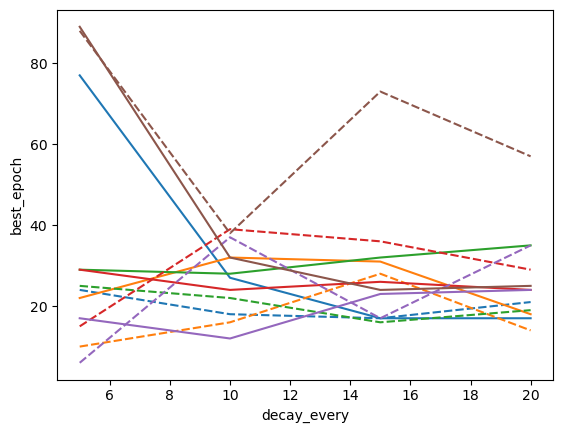

In [52]:
sns.lineplot(
    df_all, 
    x='decay_every', 
    y='best_epoch',
    style='learning_rate',
    hue='run', 
    legend=False,  # 'brief'
)

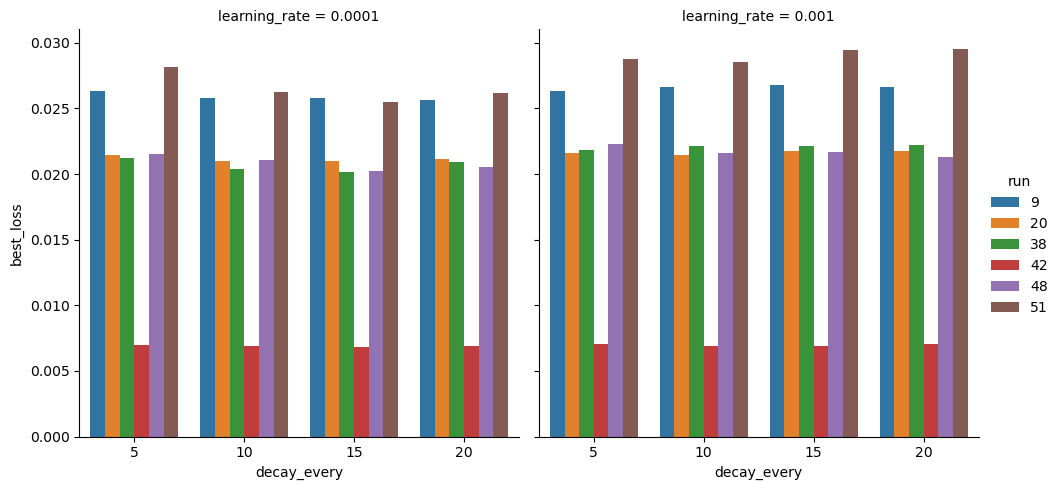

In [47]:
sns.catplot(
    df_all, 
    kind='bar',
    y='best_loss',
    x='decay_every', 
    hue='run', 
    col='learning_rate',
)